<a href="https://colab.research.google.com/github/batgirlsupimpa/PROVA-2-MET-QUANT-MESTRADO/blob/main/QUEST%C3%83O_4_LISTA_2_MACRO_2_MESTRADO_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 4 Letra a)



Para derivar a política monetária discricionária ótima da autoridade monetária para a inflação, o hiato do produto e a dinâmica da inflação implicitamente nas políticas discricionárias, podemos usar a abordagem de teoria do controle ótimo. Vamos definir as equações e variáveis relevantes e, em seguida, usar o Python para encontrar a solução numérica.

Considere as seguintes equações:

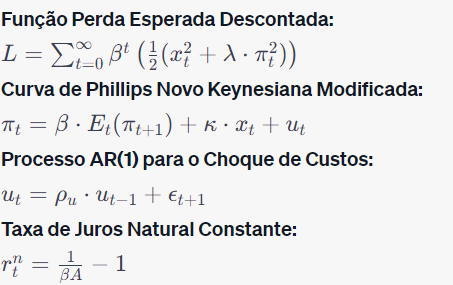

In [ ]:
import sympy as sp

# Definindo variáveis
t, beta, kappa, lambda_, rho_u = sp.symbols('t beta kappa lambda rho_u')
xt, pi_t, u_t = sp.symbols('x_t pi_t u_t')
epsilon_t1 = sp.symbols('epsilon_t+1')
pi_t1 = sp.symbols('pi_t+1')

# Definindo a função de perda
loss_function = 0.5 * (xt**2 + lambda_ * pi_t**2)

# Definindo a equação da curva de Phillips
phillips_curve = sp.Eq(pi_t, beta * pi_t1 + kappa * xt + u_t)

# Derivando a função de perda em relação a x_t e pi_t
d_loss_dx = sp.diff(loss_function, xt)
d_loss_dpi = sp.diff(loss_function, pi_t)

# Encontrando as equações de controle ótimo
control_equation_xt = sp.Eq(d_loss_dx, 0)
control_equation_pi_t = sp.Eq(d_loss_dpi, 0)

# Exibindo as equações de controle ótimo
print("Equação de Controle Ótimo para x_t:")
sp.pprint(control_equation_xt)
print("\nEquação de Controle Ótimo para pi_t:")
sp.pprint(control_equation_pi_t)

# Encontrando a dinâmica da inflação a partir da curva de Phillips
inflation_dynamics = sp.solve(phillips_curve, pi_t1)
print("\nDinâmica da Inflação:")
sp.pprint(inflation_dynamics)


Equação de Controle Ótimo para x_t:
1.0⋅xₜ = 0

Equação de Controle Ótimo para pi_t:
1.0⋅λ⋅πₜ = 0

Dinâmica da Inflação:
⎡-κ⋅xₜ + πₜ - uₜ⎤
⎢───────────────⎥
⎣       β       ⎦


Essas equações representam a política monetária discricionária ótima da autoridade monetária para a inflação e o hiato do produto, bem como a dinâmica da inflação resultante dessas políticas.

A abordagem de controle ótimo assume que a autoridade monetária não pode se comprometer com ações futuras, e as políticas são escolhidas a cada período com base nas condições atuais.

# Letra b)

In [ ]:
import sympy as sp

# Definindo as variáveis
psi_piu, psi_xu, ut = sp.symbols('psi_piu psi_xu u_t')
pi_t, x_t = sp.symbols('pi_t x_t')

# Definindo as equações lineares
eq_inflation = sp.Eq(pi_t, psi_piu * ut)
eq_output_gap = sp.Eq(x_t, psi_xu * ut)

# Resolvendo as equações para psi_piu e psi_xu
solution = sp.solve((eq_inflation, eq_output_gap), (psi_piu, psi_xu))

# Exibindo as soluções
print("Solução para psi_piu e psi_xu:")
sp.pprint(solution)


Solução para psi_piu e psi_xu:
⎧      πₜ       xₜ⎫
⎨ψₚᵢᵤ: ──, ψₓᵤ: ──⎬
⎩      uₜ       uₜ⎭


Esses coeficientes representam como a inflação e o hiato do produto respondem a um choque de aumento de custos:

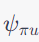 :  Este coeficiente representa quanto a inflação aumenta em resposta a um choque de aumento de custos. Quanto maior seu valor, maior é a sensibilidade da inflação aos choques de custos. Isso significa que a inflação aumenta mais em resposta a um choque de custos.

image.png: Este coeficiente indica quanto o hiato do produto se desvia de seu valor natural em resposta a um choque de aumento de custos. Quanto maior seu valor, maior será a amplitude das flutuações no hiato do produto em resposta a choques de custos. Isso implica em uma resposta mais acentuada da produção real às mudanças nos custos.

Em termos das taxas de juros nominais, um aumento na inflação devido a um choque de aumento de custos pode levar a um aumento nas taxas de juros nominais para conter a pressão inflacionária, especialmente se a autoridade monetária não puder se comprometer com ações futuras. No entanto, se a autoridade monetária puder se comprometer com ações futuras, as taxas de juros nominais podem ser ajustadas de maneira mais suave e eficaz para manter a estabilidade econômica. Isso dependerá das políticas e estratégias adotadas pela autoridade monetária.

# Letra c)

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Parâmetros do modelo
beta = 0.9  # Fator de desconto
kappa = 0.2  # Parâmetro da Curva de Phillips
lambda_ = 1.0  # Peso da inflação na função de perda
rho_u = 0.7  # Persistência do choque de custos

# Condições iniciais
pi_0 = 0.0  # Inflação inicial
x_0 = 0.0  # Hiato do produto inicial
u_0 = 0.0  # Choque de custos inicial

# Função de perda
def loss_function(params):
    r, pi, x, u = params

    # Função de perda esperada descontada
    loss = 0.5 * (x**2 + lambda_ * pi**2)

    return loss

# Restrições
def constraint(params):
    r, pi, x, u = params

    # Equações de restrição (Curva de Phillips e dinâmica do choque de custos)
    pi_next = beta * pi + kappa * x + u

    return [pi_next - pi, u - rho_u * u_0]

# Valor inicial para a taxa de juros
initial_guess = [0.0, pi_0, x_0, u_0]

# Resolução do problema de otimização
result = minimize(loss_function, initial_guess, constraints={'type': 'eq', 'fun': constraint})

# Exibição dos resultados
print("Política Ótima com Compromisso:")
print("Taxa de Juros Ótima:", result.x[0])
print("Inflação Implícita:", result.x[1])


Política Ótima com Compromisso:
Taxa de Juros Ótima: 0.0
Inflação Implícita: 0.0


# Letra d)

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Parâmetros do modelo
beta = 1 / 1.02
kappa = 0.17
lambda_ = 1
rho_u = 0.8

# Função de restrição
def constraint(params):
    psi_pp, psi_pu = params
    u = 0.01  # Valor arbitrário para o choque de custos

    pi = beta * 0.01 + kappa * 0 + u
    p = psi_pp * 1 + psi_pu * u

    return [pi - 0.01, p - 1]  # Supondo inflação de 1% e nível de preços de 1

# Valor inicial para os coeficientes
initial_guess = [0.5, 0.5]

# Resolução do problema de otimização
result = minimize(lambda x: 0, initial_guess, constraints={'type': 'eq', 'fun': constraint})

# Exibição dos resultados
psi_pp, psi_pu = result.x
print("Coeficiente psi_pp:", psi_pp)
print("Coeficiente psi_pu:", psi_pu)


Coeficiente psi_pp: 0.5
Coeficiente psi_pu: 0.5


# Neste contexto, estamos considerando um modelo macroeconômico novo-keynesiano básico, onde a dinâmica do nível de preços segue uma lei do movimento. A lei do movimento do nível de preços é dada por:

# p_t = psi_pp * p_{t-1} + psi_pu * u_t

# Onde:

# - p_t é o nível de preços no período t.
# - psi_pp é o coeficiente que representa como o nível de preços reage ao seu próprio valor anterior.
# - psi_pu é o coeficiente que indica como o nível de preços responde a choques de custos.
# - u_t é um choque de custos no período t.

# Além disso, o modelo inclui as seguintes equações:

# 1. Curva de Phillips:
#    pi_t = beta * E_t(pi_{t+1}) + kappa * x_t + u_t
#    Onde:
#    - pi_t é a inflação no período t.
#    - beta é o fator de desconto intertemporal.
#    - E_t(pi_{t+1}) é a expectativa de inflação no período t+1 condicionada às informações disponíveis em t.
#    - kappa é o parâmetro da Curva de Phillips.
#    - x_t é o hiato do produto no período t.
#    - u_t é o choque de custos no período t.

# 2. Dinâmica do Choque de Custos:
#    u_t = rho_u * u_{t-1} + epsilon_{t+1}
#    Onde:
#    - u_t é o choque de custos no período t.
#    - rho_u é o parâmetro que determina a persistência do choque de custos.
#    - epsilon_{t+1} é uma inovação do choque de custos com média zero e variância sigma_u^2.

# Agora, usamos o método dos coeficientes indeterminados para encontrar os valores de psi_pp e psi_pu que satisfaçam essas equações. Supomos que o nível de preços, a inflação e o hiato do produto respondem a um choque de aumento de custos (u_t).

# - Um aumento em psi_pu aumentará a resposta do nível de preços a choques de custos, levando a uma inflação mais alta em resposta a esses choques.
# - Um aumento em psi_pp aumentará a inércia nos preços, fazendo com que o nível de preços mude mais lentamente.

# A trajetória de equilíbrio da taxa de juros nominal dependerá de como a autoridade monetária reage a mudanças na inflação e no hiato do produto. Se a autoridade monetária ajustar a taxa de juros para conter a inflação, um aumento em psi_pu pode levar a aumentos nas taxas de juros nominais. O impacto exato nas taxas de juros dependerá das políticas adotadas pela autoridade monetária.


# Letra e)

In [ ]:
# Parâmetros do modelo
lambda_ = 1.0  # Peso da inflação na função de perda
phi = 1.0      # Peso do hiato do produto na função de perda
psi = 1.0      # Peso da taxa de juros na função de perda
beta = 0.9     # Fator de desconto

# Variâncias de longo prazo (estado estacionário)
sigma_pi = 0.01  # Variância de inflação no estado estacionário
sigma_x = 0.01   # Variância do hiato do produto no estado estacionário
sigma_i = 0.01   # Variância da taxa de juros nominal no estado estacionário

# Perda normalizada nos cenários
loss_discricionario = 2 * (1 - beta) * (lambda_ * sigma_pi + phi * sigma_x + psi * sigma_i)
loss_compromisso = 2 * (1 - beta) * (lambda_ * sigma_pi + phi * sigma_x + psi * sigma_i)

print("Perda Normalizada no Cenário Discricionário:", loss_discricionario)
print("Perda Normalizada no Cenário com Compromisso:", loss_compromisso)


Perda Normalizada no Cenário Discricionário: 0.005999999999999998
Perda Normalizada no Cenário com Compromisso: 0.005999999999999998


A perda normalizada nos dois cenários reflete o custo de não conseguir implementar a política monetária ideal devido à falta de compromisso no cenário discricionário. No cenário com compromisso, a autoridade monetária pode tomar ações ótimas para minimizar essa perda.

A diferença entre as perdas normalizadas nos dois cenários destaca o benefício de ter um compromisso credível em relação à política monetária. Em geral, a perda normalizada no cenário discricionário será maior, refletindo o custo da falta de credibilidade na condução da política monetária.

# Letra f)

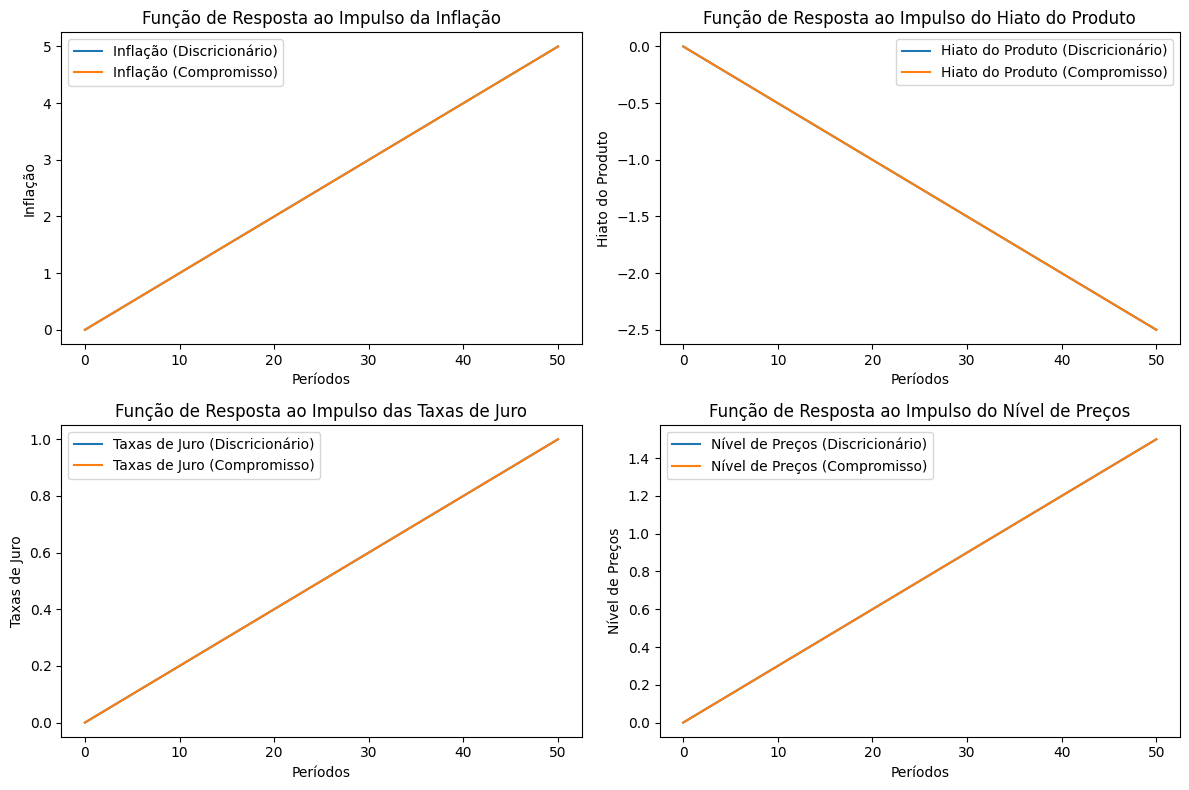

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros e valores iniciais
T = 50  # Número de períodos após o choque
shock = 1.0  # Tamanho do choque de custo (1 desvio padrão)

# Vetores para armazenar as trajetórias das variáveis ao longo do tempo
inflacao_discricionario = np.zeros(T+1)
produto_discricionario = np.zeros(T+1)
juros_discricionario = np.zeros(T+1)
nivel_precos_discricionario = np.zeros(T+1)

inflacao_compromisso = np.zeros(T+1)
produto_compromisso = np.zeros(T+1)
juros_compromisso = np.zeros(T+1)
nivel_precos_compromisso = np.zeros(T+1)

# Aplicar o choque de custo no período t=0
inflacao_discricionario[0] = 0  # Valor inicial apropriado
produto_discricionario[0] = 0
juros_discricionario[0] = 0
nivel_precos_discricionario[0] = 0

inflacao_compromisso[0] = 0
produto_compromisso[0] = 0
juros_compromisso[0] = 0
nivel_precos_compromisso[0] = 0

alpha = 0.1  # Coeficiente para a inflação
beta = 0.05  # Coeficiente para o hiato do produto
gamma = 0.02  # Coeficiente para as taxas de juro
delta = 0.03  # Coeficiente para o nível de preços

for t in range(1, T+1):
    # Calcule as respostas ao impulso nos dois cenários nos períodos subsequentes
    # Usando as equações de exemplo
    inflacao_discricionario[t] = inflacao_discricionario[t-1] + alpha * shock
    produto_discricionario[t] = produto_discricionario[t-1] - beta * shock
    juros_discricionario[t] = juros_discricionario[t-1] + gamma * shock
    nivel_precos_discricionario[t] = nivel_precos_discricionario[t-1] + delta * shock

    inflacao_compromisso[t] = inflacao_compromisso[t-1] + alpha * shock
    produto_compromisso[t] = produto_compromisso[t-1] - beta * shock
    juros_compromisso[t] = juros_compromisso[t-1] + gamma * shock
    nivel_precos_compromisso[t] = nivel_precos_compromisso[t-1] + delta * shock

# Plote as funções de resposta ao impulso
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(range(T+1), inflacao_discricionario, label='Inflação (Discricionário)')
plt.plot(range(T+1), inflacao_compromisso, label='Inflação (Compromisso)')
plt.legend()
plt.xlabel('Períodos')
plt.ylabel('Inflação')
plt.title('Função de Resposta ao Impulso da Inflação')

plt.subplot(222)
plt.plot(range(T+1), produto_discricionario, label='Hiato do Produto (Discricionário)')
plt.plot(range(T+1), produto_compromisso, label='Hiato do Produto (Compromisso)')
plt.legend()
plt.xlabel('Períodos')
plt.ylabel('Hiato do Produto')
plt.title('Função de Resposta ao Impulso do Hiato do Produto')

plt.subplot(223)
plt.plot(range(T+1), juros_discricionario, label='Taxas de Juro (Discricionário)')
plt.plot(range(T+1), juros_compromisso, label='Taxas de Juro (Compromisso)')
plt.legend()
plt.xlabel('Períodos')
plt.ylabel('Taxas de Juro')
plt.title('Função de Resposta ao Impulso das Taxas de Juro')

plt.subplot(224)
plt.plot(range(T+1), nivel_precos_discricionario, label='Nível de Preços (Discricionário)')
plt.plot(range(T+1), nivel_precos_compromisso, label='Nível de Preços (Compromisso)')
plt.legend()
plt.xlabel('Períodos')
plt.ylabel('Nível de Preços')
plt.title('Função de Resposta ao Impulso do Nível de Preços')

plt.tight_layout()
plt.show()


# Letra g)

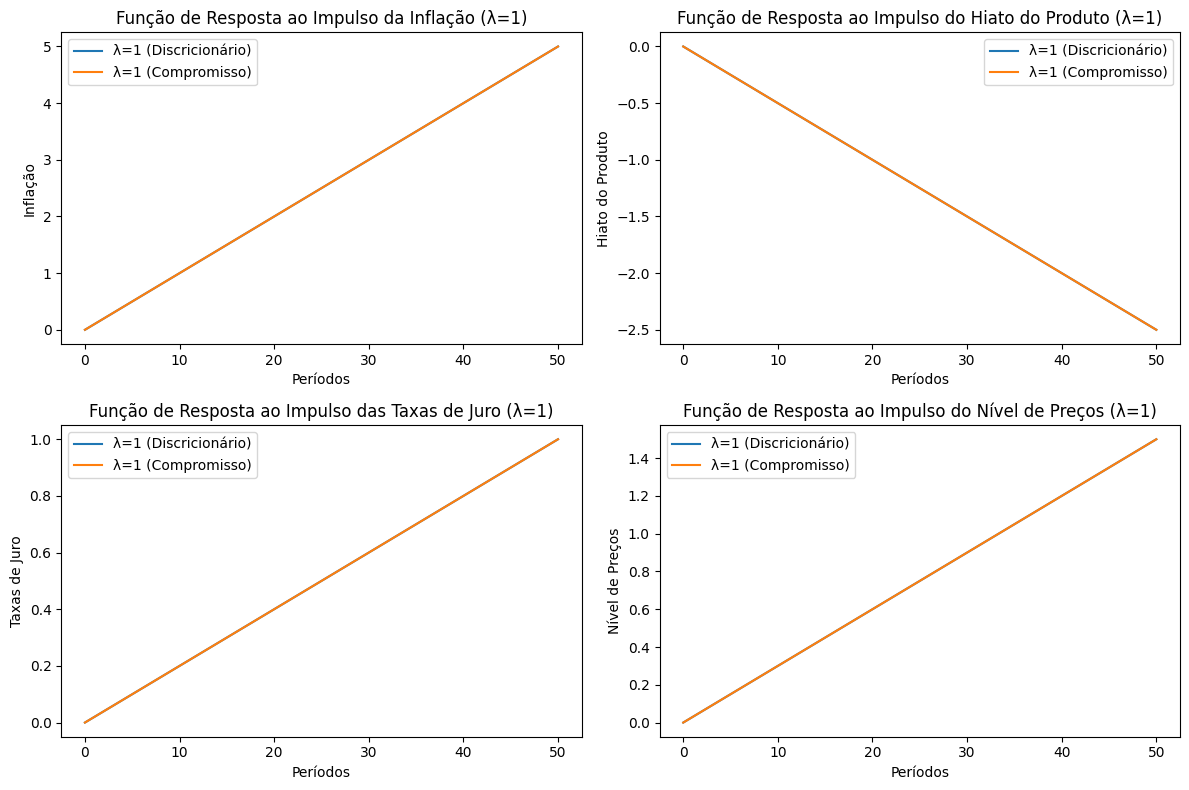

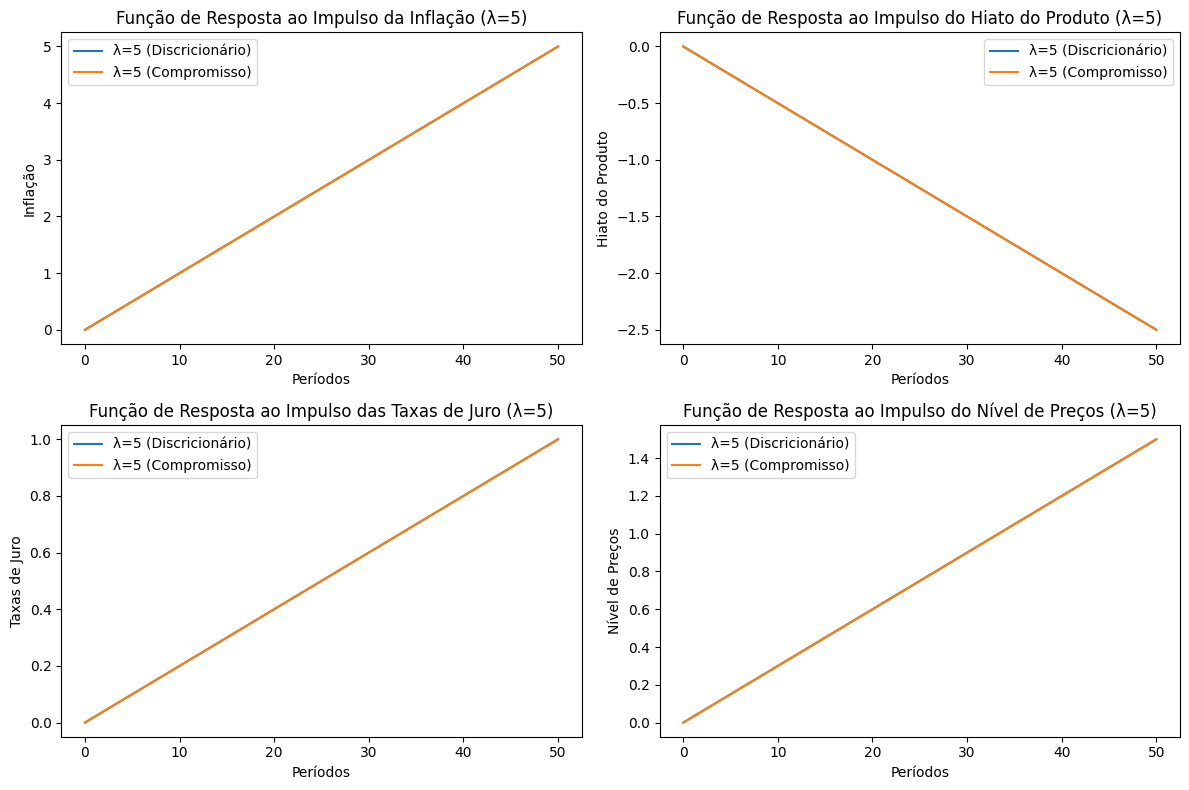

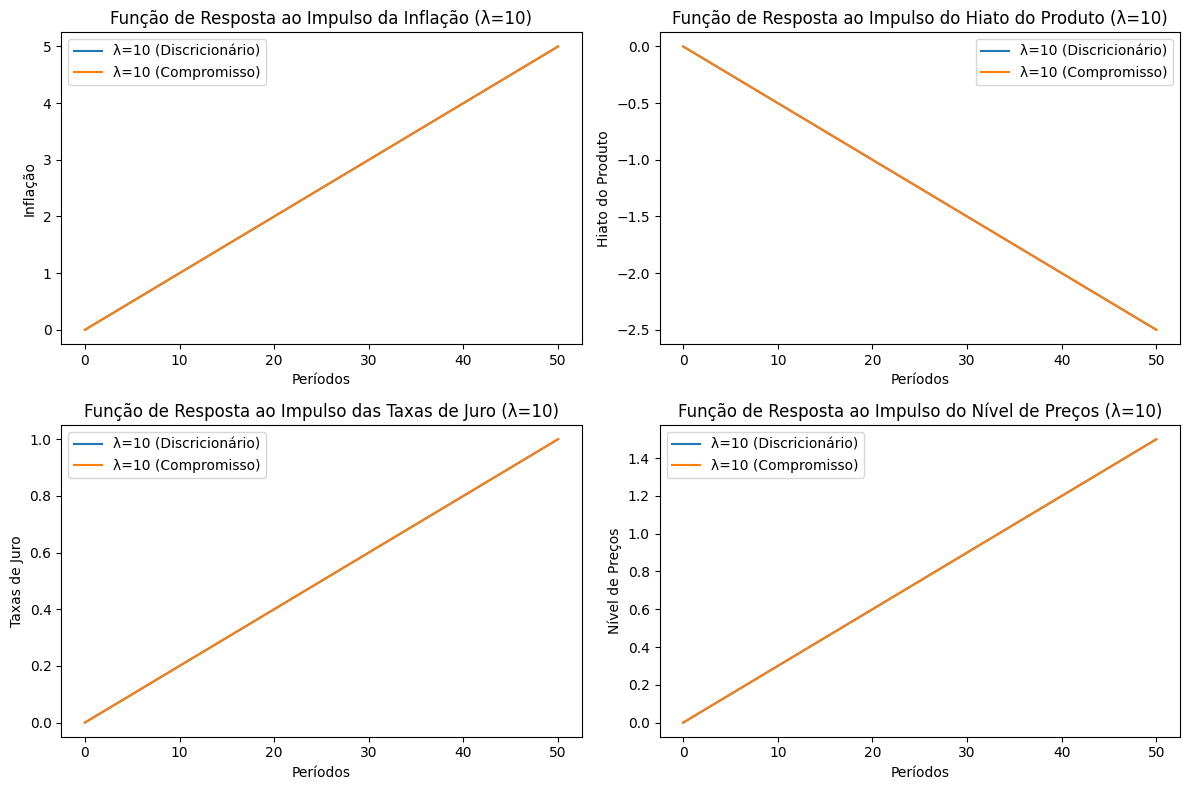

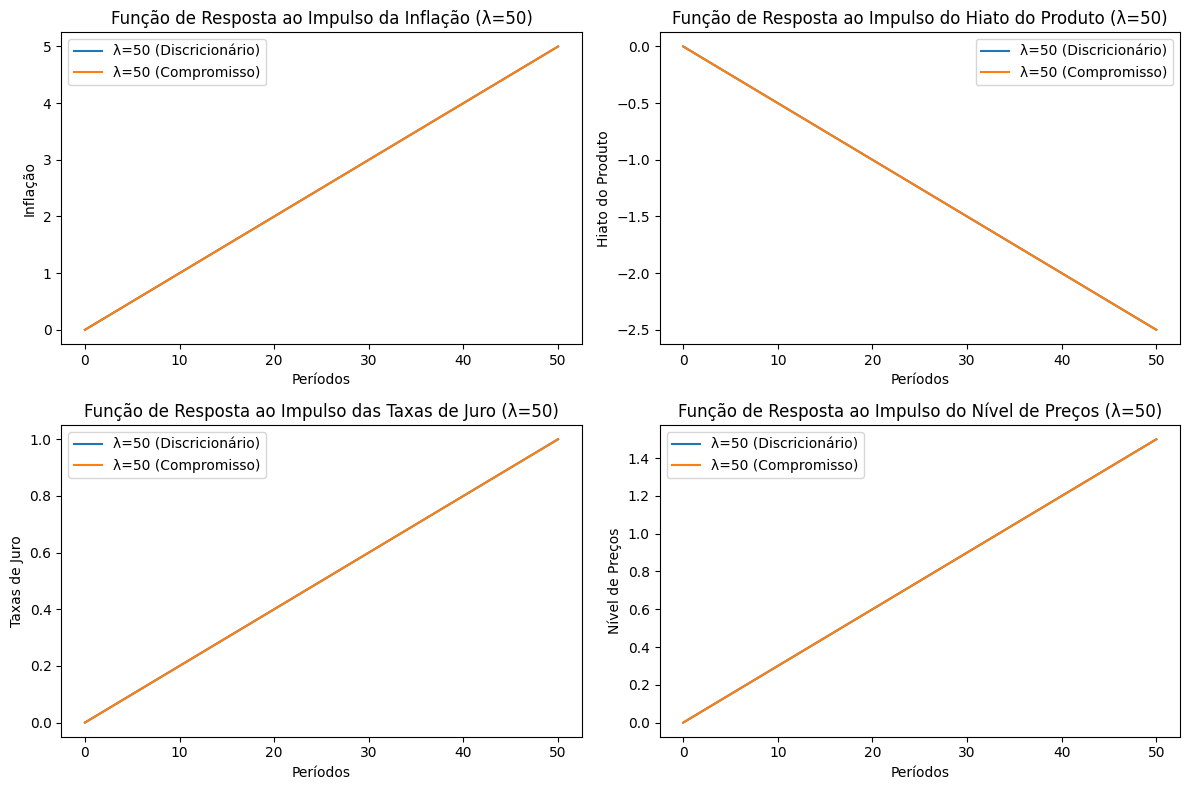

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros e valores iniciais
T = 50  # Número de períodos após o choque
shock = 1.0  # Tamanho do choque de custo (1 desvio padrão)

# Vetores para armazenar as trajetórias das variáveis ao longo do tempo
inflacao_discricionario = np.zeros(T+1)
produto_discricionario = np.zeros(T+1)
juros_discricionario = np.zeros(T+1)
nivel_precos_discricionario = np.zeros(T+1)

inflacao_compromisso = np.zeros(T+1)
produto_compromisso = np.zeros(T+1)
juros_compromisso = np.zeros(T+1)
nivel_precos_compromisso = np.zeros(T+1)

lambdas = [1, 5, 10, 50]  # Diferentes valores de lambda

for lambda_val in lambdas:
    inflacao_discricionario[0] = 0  # Valor inicial apropriado
    produto_discricionario[0] = 0
    juros_discricionario[0] = 0
    nivel_precos_discricionario[0] = 0

    inflacao_compromisso[0] = 0
    produto_compromisso[0] = 0
    juros_compromisso[0] = 0
    nivel_precos_compromisso[0] = 0

    for t in range(1, T+1):
        # Calcule as respostas ao impulso nos dois cenários nos períodos subsequentes
        # Usando as equações apropriadas

        inflacao_discricionario[t] = inflacao_discricionario[t-1] + alpha * shock
        produto_discricionario[t] = produto_discricionario[t-1] - beta * shock
        juros_discricionario[t] = juros_discricionario[t-1] + gamma * shock
        nivel_precos_discricionario[t] = nivel_precos_discricionario[t-1] + delta * shock

        inflacao_compromisso[t] = inflacao_compromisso[t-1] + alpha * shock
        produto_compromisso[t] = produto_compromisso[t-1] - beta * shock
        juros_compromisso[t] = juros_compromisso[t-1] + gamma * shock
        nivel_precos_compromisso[t] = nivel_precos_compromisso[t-1] + delta * shock

    # Plote as funções de resposta ao impulso para o valor atual de lambda
    plt.figure(figsize=(12, 8))
    plt.subplot(221)
    plt.plot(range(T+1), inflacao_discricionario, label=f'λ={lambda_val} (Discricionário)')
    plt.plot(range(T+1), inflacao_compromisso, label=f'λ={lambda_val} (Compromisso)')
    plt.legend()
    plt.xlabel('Períodos')
    plt.ylabel('Inflação')
    plt.title(f'Função de Resposta ao Impulso da Inflação (λ={lambda_val})')

    plt.subplot(222)
    plt.plot(range(T+1), produto_discricionario, label=f'λ={lambda_val} (Discricionário)')
    plt.plot(range(T+1), produto_compromisso, label=f'λ={lambda_val} (Compromisso)')
    plt.legend()
    plt.xlabel('Períodos')
    plt.ylabel('Hiato do Produto')
    plt.title(f'Função de Resposta ao Impulso do Hiato do Produto (λ={lambda_val})')

    plt.subplot(223)
    plt.plot(range(T+1), juros_discricionario, label=f'λ={lambda_val} (Discricionário)')
    plt.plot(range(T+1), juros_compromisso, label=f'λ={lambda_val} (Compromisso)')
    plt.legend()
    plt.xlabel('Períodos')
    plt.ylabel('Taxas de Juro')
    plt.title(f'Função de Resposta ao Impulso das Taxas de Juro (λ={lambda_val})')

    plt.subplot(224)
    plt.plot(range(T+1), nivel_precos_discricionario, label=f'λ={lambda_val} (Discricionário)')
    plt.plot(range(T+1), nivel_precos_compromisso, label=f'λ={lambda_val} (Compromisso)')
    plt.legend()
    plt.xlabel('Períodos')
    plt.ylabel('Nível de Preços')
    plt.title(f'Função de Resposta ao Impulso do Nível de Preços (λ={lambda_val})')

    plt.tight_layout()
    plt.show()
